[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

In [ ]:
# Baixar arquivos adicionais para o laboratório.
!wget https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/ml_intro/class_02/Laborat%C3%B3rios/lab_utils_ml_intro_week_2.zip
!unzip -n -q lab_utils_ml_intro_week_2.zip

# Regressão usando o Scikit-Learn

Há um kit de ferramentas de aprendizado de máquina de código aberto e comercialmente utilizável chamado [scikit-learn](https://scikit-learn.org/stable/index.html). Esse kit de ferramentas contém implementações de muitos dos algoritmos com os quais você trabalhará neste curso.



## Objetivos
Neste laboratório, você fará o seguinte
- Utilizar o scikit-learn para implementar a regressão linear usando o Gradient Descent

## Ferramentas
Você utilizará funções do scikit-learn, bem como do matplotlib e do NumPy. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
from lab_utils_common import dlc
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')

# Gradiente Descendente
O Scikit-learn tem um modelo de regressão de descida de gradiente [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Como sua implementação anterior de descida de gradiente, esse modelo tem melhor desempenho com entradas normalizadas. O [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) executará a normalização _z-score_ como em um laboratório anterior. Aqui ela é chamada de "_standard score_".

### Carregar o Conjunto de Dados

In [2]:
X_train, y_train = load_house_data()
X_features = ['tamanho(sqft)','quartos','andares','idade']

### Escalar/normalizar o conjunto de treino

In [4]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f" Faixa de pico a pico por coluna em dos dados originais em X:{np.ptp(X_train,axis=0)}")   
print(f" Faixa de pico a pico por coluna em dos dados de X normalizados:{np.ptp(X_norm,axis=0)}")

 Faixa de pico a pico por coluna em dos dados originais em X:[2.41e+03 4.00e+00 1.00e+00 9.50e+01]
 Faixa de pico a pico por coluna em dos dados de X normalizados:[5.85 6.14 2.06 3.69]


### Criar e ajustar o modelo de regressão

In [5]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"quantidade de iterações completadas: {sgdr.n_iter_}, quantidade de atualizações de peso: {sgdr.t_}")

SGDRegressor()
quantidade de iterações completadas: 130, quantidade de atualizações de peso: 12871.0


### Exibir parâmetros
Observe que os parâmetros estão associados aos dados de entrada *normalizados*. Os parâmetros de ajuste são muito próximos aos encontrados no laboratório anterior com esses dados.

In [6]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"parâmetros do modelo:                   w: {w_norm}, b:{b_norm}")
print( "parâmetros do modelo do laboratório anterior: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

parâmetros do modelo:                   w: [110.2  -21.14 -32.53 -38.01], b:[363.15]
parâmetros do modelo do laboratório anterior: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Fazer previsões
Preveja os alvos dos dados de treinamento. Use a rotina `predict` e calcule usando $w$ e $b$.

In [7]:
# Fazer uma previsão usando sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# Faça uma previsão usando w,b. 
y_pred = np.dot(X_norm, w_norm) + b_norm  
print(f"previsão usando np.dot() e sgdr.predict são iguais? {(y_pred == y_pred_sgd).all()}")

print(f"Predição no conjunto de treino:\n{y_pred[:4]}" )
print(f"Valores alvo \n{y_train[:4]}")

previsão usando np.dot() e sgdr.predict são iguais? True
Predição no conjunto de treino:
[295.19 485.82 389.52 491.98]
Valores alvo 
[300.  509.8 394.  540. ]


### Plotar resultados
Vamos plotar as previsões em relação aos valores-alvo.

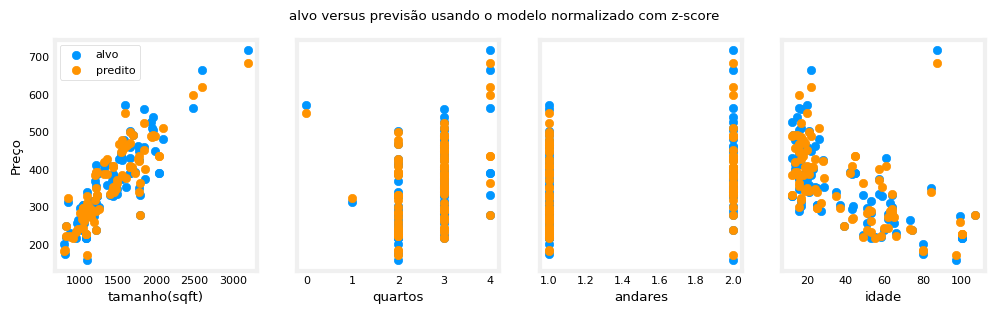

In [8]:
# Plotar previsões e alvos versus recursos originais    
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'alvo')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],y_pred,color=dlc["dlorange"], label = 'predito')
ax[0].set_ylabel("Preço"); ax[0].legend();
fig.suptitle("alvo versus previsão usando o modelo normalizado com z-score")
plt.show()

## Parabéns!
Neste laboratório, você:
- utilizou um kit de ferramentas de aprendizado de máquina de código aberto, o scikit-learn
- implementou a regressão linear usando a descida de gradiente e a normalização de recursos desse kit de ferramentas